In [92]:
import os
import pydotplus 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interp
from itertools import cycle

import sklearn
from sklearn import preprocessing,tree,svm,datasets,metrics
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor

# data preprocessing

  ## read data from csv file

In [93]:
dtype={'age':np.int64,
        'job' : np.str_,
        'marital' : np.str_,
        'education' : np.str_,
        'default' : np.str_,
        'housing' : np.str_,
        'loan':np.str_,
        'contact' : np.str_,
        'month' : np.str_,
        'day_of_week' : np.str_,
        'duration' : np.int64,
        'campaign':np.int64,
        'pdays':np.int64,
        'previous':np.int64,
        'poutcome':np.str_,
        'emp.var.rate':np.float64,
        'cons.price.idx':np.float64,
        'cons.conf.idx':np.float64,
        'euribor3m':np.float64,
        'nr.employed':np.float64,
        'y':np.str_}
data = pd.read_csv("bank_clean.csv",dtype=dtype, usecols=dtype)

  ## data encoding

In [94]:
con_col = [i for i in data.columns if (data.dtypes[i] == 'int64') | (data.dtypes[i] == 'float64')]
cat_col = [i for i in data.columns if (i not in con_col)]
for col in cat_col:
    LBL_Model = preprocessing.LabelEncoder()
    LBL_Model.fit(data[col])
    data[col] = LBL_Model.transform(data[col])

  ## split training data and testing data

In [100]:
Train_X = data.drop('y',axis = 1)
Y = data['y']
X_train,X_test,Y_train,Y_test = train_test_split(Train_X,Y,test_size = 0.2)

  ## data standard scaling

In [101]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# machine learning models

  ## use decision tree model

In [102]:
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, Y_train)
dt_params = dt.get_params()
dt_prediction = dt.predict(X_test)

  ## use svm model

In [103]:
svm_model = svm.SVC()
svm_model.fit(X_train,Y_train)
svm_params = svm_model.get_params()
svm_prediction = svm_model.predict(X_test)

# data visualization

  ## plotting decision tree model

   ### export dot file for plotting

In [105]:
with open("banking.dot", 'w') as f:
    f = tree.export_graphviz(dt, out_file=f)
os.unlink('banking.dot')

   ### plotting decision tree model and export to PDF file

In [106]:
dot_data = tree.export_graphviz(dt, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("banking.pdf")

True

  ## plotting ROC curves of above models

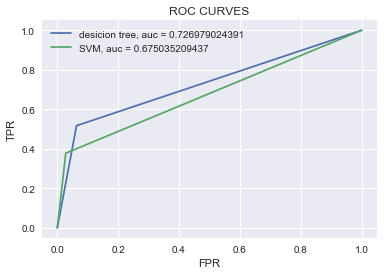

In [104]:
%matplotlib inline
plt.figure(0).clf()

def data_visualize(prediction,name):
    fpr, tpr, thresh = metrics.roc_curve(Y_test, prediction)
    auc = metrics.roc_auc_score(Y_test, prediction)
    plt.plot(fpr,tpr,label = name + str(auc))
    
data_visualize(dt_prediction, "desicion tree, auc = ")
data_visualize(svm_prediction, "SVM, auc = ")

plt.legend(loc=0)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVES')
plt.grid(True)